In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import libpysal as lp
import mapclassify as mc
import pysal as ps
from legendgram import legendgram 

import seaborn

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# Fonde de carte
k = '/Users/confade/Documents/covid-bo/gpkg-bo/muni_bol.gpkg'
u = '/Users/confade/Documents/covid-bo/gpkg-bo/dptos_bol.gpkg'
gdf = gpd.read_file(k)
dptos = gpd.read_file(u)

In [3]:
gdf.columns

Index(['codigo', 'dptos', 'provincia', 'mun', 'capital', 'id_municip',
       'geometry'],
      dtype='object')

In [4]:
#filtro: muni_bol.gpkg
muni_a = gdf[['id_municip', 'geometry']]
muni_a.shape

(339, 2)

In [5]:
d = '/Users/confade/Documents/analyse_covid-bo/taux-prevalence/donnees/pob-bo_2020.csv'
c = '/Users/confade/Documents/analyse_covid-bo/taux-prevalence/donnees/covid-muni.csv'
df = pd.read_csv(d)
dc = pd.read_csv(c)

In [6]:
dc.columns

Index(['index_muni', 'O_guia', 'id_municip', 'Dpto', 'Municipio', '_060420',
       '_070420', '_080420', '_090420', '_100420', '_110420', '_120420',
       '_130420', '_140420', '_150420', '_160420', '_170420', '_180420',
       '_190420', '_200420', '_210420', '_220420', '_230420', '_240420',
       '_250420', '_260420', '_270420', '_280420', '_290420', '_300420',
       '_010520', '_020520', '_030520', '_040520', '_050520', '_060520',
       '_070520', '_080520', '_090520', '_100520', '_110520', '_120520',
       '_130520', '_140520', '_150520', '_160520', '_170520', '_180520',
       '_190520', '_200520', '_210520', '_220520', '_230520', '_240520',
       '_250520', '_260520', '_270520', '_280520', '_290520', '_300520'],
      dtype='object')

In [22]:
# Filtro: datos de covid
cov = dc[['id_municip', '_300520']]
cov.shape

(110, 2)

In [23]:
# datos población
df.columns

Index(['orden', 'id_municip', 'dpto', 'prov', 'muni', '_2012', '_2013',
       '_2014', '_2015', '_2016', '_2017', '_2018', '_2019', '_2020'],
      dtype='object')

In [24]:
# Filtro: datos de población
pob  = df[['id_municip', 'muni', '_2020']]
pob.shape

(339, 3)

In [25]:
# Merge: cov-pob
covpob = cov.merge(pob, on='id_municip')
covpob.shape

(110, 4)

In [26]:
covpob.sample()

id_municip  _300520   muni   _2020
11   id010101       19  Sucre  295476

In [27]:
covpob.columns

Index(['id_municip', '_300520', 'muni', '_2020'], dtype='object')

In [28]:
covpob['ix100k'] = covpob['_300520'] / covpob['_2020']*100000

In [29]:
covpob.shape

(110, 5)

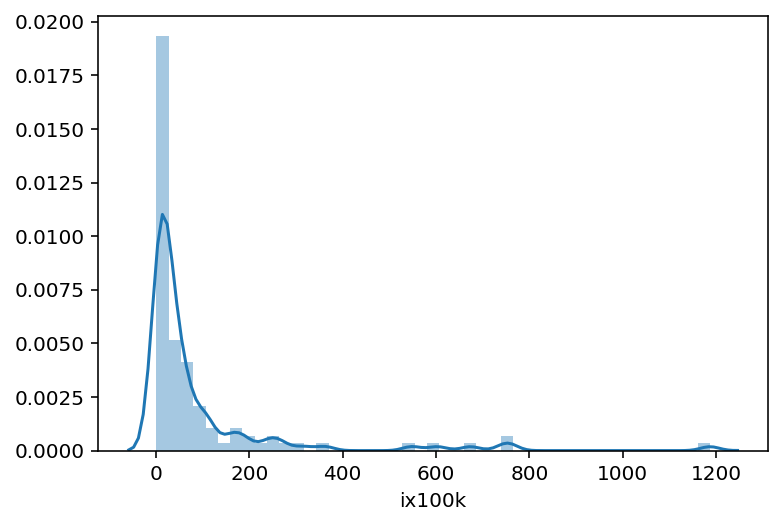

In [49]:
hist = seaborn.distplot(covpob['ix100k']);

In [50]:
# Merge: muni-pob
munipob = muni_a.merge(covpob, on='id_municip')
munipob.shape

(110, 6)

In [57]:
# Discretization
y = munipob['ix100k']
fj5 = mc.FisherJenks(y, k=5)
fj5

FisherJenks               

     Interval        Count
--------------------------
[   0.96,   75.15] |    83
(  75.15,  197.01] |    15
( 197.01,  362.03] |     6
( 362.03,  757.74] |     5
( 757.74, 1187.08] |     1

In [58]:
#fj5.head()

In [59]:
bins = mc.FisherJenks(munipob['ix100k'].values, k=5).bins

In [60]:
from legendgram import legendgram
import palettable.matplotlib as mplpal

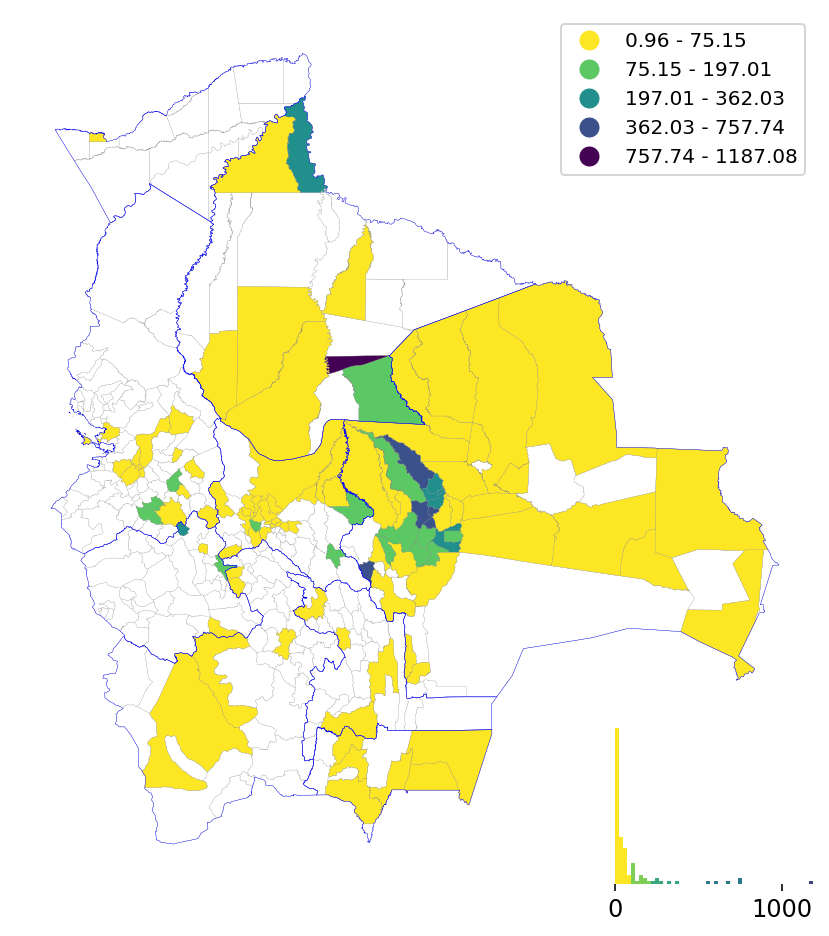

In [61]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw = {'aspect' : 'equal'})
muni_a.plot(ax=ax, edgecolor = 'grey', linewidth = 0.1, facecolor = 'w')
munipob.plot(column='ix100k', scheme='FisherJenks', k=5, cmap = 'viridis_r',
             legend = True, ax=ax, edgecolor = 'grey', linewidth = 0.1)
ax.set_axis_off()
dptos.plot(ax=ax, edgecolor = 'b', linewidth = 0.2, facecolor = 'none')
legendgram(fig, ax, munipob['ix100k'], bins, pal=mplpal.Viridis_5_r,
          legend_size=(0.25, 0.1875),
          loc='lower right',
          clip=(0, 1200))

#plt.annotate()
plt.show()